Este archivo lo que hace es generar información rápida sobre toda la
simulación.

Se grafican la evolución de las variables de una simulación en un punto
en conjunto con la evolución de la densidad de energía.


In [1]:
# Librerías a usar
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy.polynomial.polynomial as poly
import matplotlib
import matplotlib.patches as mpatches

In [3]:
# Path de los archivos que quiero abrir
#path = '/run/media/cecere/7d4a4576-37a1-4a7a-bcab-27905bc96ce8/Backup_femputadora/data_loop/'
path = '/home/cecere/sshfs/hila/'
simulacion1 ='desequilibrio_3'
simulacion2 ='desequilibrio_4'
simulacion3 ='desequilibrio_5'

# Tomo el primer dato para ver que contiene el archivo
ex = h5py.File(path+simulacion1+'/'+'welbalanced_hdf5_plt_cnt_0000','r')
ex.keys() # para ver toda la información que contiene el archivo

ncx1b  = list(ex['integer scalars'][0])[1]     # Número de celdas en un bloque en x
    #print(nxb)
ncy1b  = list(ex['integer scalars'][1])[1]     # Número de celdas en un bloque en y
    #print(nyb)
boundb = ex['bounding box'][:,:,:]           # Coordenada central de cada bloque
    #print(boundb)
    
niprocs = list(ex['integer scalars'][7])[1]     # Número de procesadores usados en x = número de bloques en x
    #print(niprocs)
njprocs = list(ex['integer scalars'][8])[1]
    #print(njprocs)
nb = list(f['integer scalars'][4])[1]   # Número total de bloques iprocs x jprocs
    #print(nb)

In [4]:
# Defino los índices de tiempo mínimo y máximo
itmin = 0
itmax = 1000
# Defino el tiempo físico
time=np.arange(itmin, itmax+1)*0.5 # 1 plot cada 0.5 segundos
print(time[itmax])

500.0


In [6]:
# Da las coordenadas del centro de los bloques
#print(list(f['coordinates']))

# Da las 3 coordenadas del centro del bloque 0 (hay 49 elementos)
#print(list(f['coordinates'][0]))

# Da las coordenadas x, y, z del centro del bloque 0 (hay 49 elementos)
# f['coordinates'][bloque][coordenada]
#print(f['coordinates'][0][0])
#print(f['coordinates'][0][1])
#print(f['coordinates'][0][2])

# Defino deltaxb: coordenada x ([0]) del segundo bloque en x [1] menos el primer bloque [0].
deltaxb = np.abs(list(ex['coordinates'][1])[0]-list(ex['coordinates'][0])[0])
#print(deltaxb)

# Defino deltax: deltaxb entre los centros de los primeros 2 bloques / número de celdas en 1 bloque
deltax = deltaxb/ncx1b
#print(deltax)

# Defino deltayb: coordenada y ([1]) del segundo bloque en y [niprocs] menos el primer bloque [0].
deltayb = np.abs(list(ex['coordinates'][niprocs])[1]-list(ex['coordinates'][0])[1])
#print(deltayb)

# Defino deltay: deltayb entre los centros de los primeros 2 bloques / número de celdas en 1 bloque
deltay = deltayb/ncy1b
#print(deltay)

# Defino xmin = valor en x del centro del bloque cero - 1/2 del deltax de 1 bloque
xmin = list(ex['coordinates'][0])[0] - 0.5*deltaxb
#print(xmin)

# Defino xmax = valor en x del centro del bloque niprocs-1 + 1/2 del deltax de 1 bloque
xmax = list(ex['coordinates'][niprocs-1])[0] + 0.5*deltaxb
#print(xmax)

# Ojo, puede haber problemas por la precision
#print(type(list(f['coordinates'][niprocs-1])[0]))
#print(type(0.5*deltaxb))
# Se cambia la precisión así:
#dummy = f['coordinates'][niprocs-1][0]
#dummy = dummy.astype('float64')
#print(type(dummy))

# Defino ymin = valor en y del centro del bloque cero - 1/2 del deltay de 1 bloque
ymin = list(ex['coordinates'][0])[1] - 0.5*deltayb
#print(ymin)

# Defino ymax = valor en y del centro del bloque (niprocs-1)*njprocs + 1/2 del deltay de 1 bloque
ymax = list(ex['coordinates'][(niprocs-1)*njprocs])[1] + 0.5*deltayb
#print(ymax)

In [8]:
# Leo los archivos de datos
for i in range(itmin,itmax):
    if   i < 10 :       # Poner el path que corresponda
        f = h5py.File(path+simulacion1+'/'+'welbalanced_hdf5_plt_cnt_000'+str(i),'r')
        g = h5py.File(path+simulacion2+'/'+'welbalanced_hdf5_plt_cnt_000'+str(i),'r')
        h = h5py.File(path+simulacion3+'/'+'welbalanced_hdf5_plt_cnt_000'+str(i),'r')
    elif i < 100 :
        f = h5py.File(path+simulacion1+'/'+'welbalanced_hdf5_plt_cnt_00'+str(i),'r')
        g = h5py.File(path+simulacion2+'/'+'welbalanced_hdf5_plt_cnt_00'+str(i),'r')
        h = h5py.File(path+simulacion3+'/'+'welbalanced_hdf5_plt_cnt_00'+str(i),'r')
    else :
        f = h5py.File(path+simulacion1+'/'+'welbalanced_hdf5_plt_cnt_0'+str(i),'r')
        g = h5py.File(path+simulacion2+'/'+'welbalanced_hdf5_plt_cnt_0'+str(i),'r')
        h = h5py.File(path+simulacion3+'/'+'welbalanced_hdf5_plt_cnt_0'+str(i),'r')
    
    print(f)

<HDF5 file "welbalanced_hdf5_plt_cnt_0000" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0001" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0002" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0003" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0004" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0005" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0006" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0007" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0008" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0009" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0010" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0011" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0012" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0013" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0014" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0015" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0016" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0017" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0018" (mo

<HDF5 file "welbalanced_hdf5_plt_cnt_0159" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0160" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0161" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0162" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0163" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0164" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0165" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0166" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0167" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0168" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0169" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0170" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0171" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0172" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0173" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0174" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0175" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0176" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0177" (mo

<HDF5 file "welbalanced_hdf5_plt_cnt_0340" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0341" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0342" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0343" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0344" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0345" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0346" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0347" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0348" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0349" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0350" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0351" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0352" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0353" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0354" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0355" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0356" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0357" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0358" (mo

<HDF5 file "welbalanced_hdf5_plt_cnt_0495" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0496" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0497" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0498" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0499" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0500" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0501" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0502" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0503" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0504" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0505" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0506" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0507" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0508" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0509" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0510" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0511" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0512" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0513" (mo

<HDF5 file "welbalanced_hdf5_plt_cnt_0664" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0665" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0666" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0667" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0668" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0669" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0670" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0671" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0672" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0673" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0674" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0675" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0676" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0677" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0678" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0679" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0680" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0681" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0682" (mo

<HDF5 file "welbalanced_hdf5_plt_cnt_0836" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0837" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0838" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0839" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0840" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0841" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0842" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0843" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0844" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0845" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0846" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0847" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0848" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0849" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0850" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0851" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0852" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0853" (mode r)>
<HDF5 file "welbalanced_hdf5_plt_cnt_0854" (mo

In [9]:
# Para graficar
rango=(xmin,xmax,ymin,ymax)

# Número total de celdas en "x" y en "y"
ncx = niprocs*ncx1b
ncy = njprocs*ncy1b
#print(ncy)

# Inicializando a cero los elementos de la matriz a graficar
dens1=np.zeros((ncx,ncy))
#print(dens.shape)
magy1=np.zeros((ncx,ncy))
dens2=np.zeros((ncx,ncy))
magy2=np.zeros((ncx,ncy))
dens3=np.zeros((ncx,ncy))
magy3=np.zeros((ncx,ncy))

# Construyo la matriz con los bloques de los datos
# El orden debe ser (y,x)
for iby in range(njprocs):
    for ibx in range(niprocs):
        for iy in range(ncy1b):
            for ix in range(ncx1b):
                dens1[iby*ncy1b+iy,ibx*ncx1b+ix]=f['dens'][ibx+iby*niprocs,0,iy,ix]
                magy1[iby*ncy1b+iy,ibx*ncx1b+ix]=f['magy'][ibx+iby*niprocs,0,iy,ix]
                dens2[iby*ncy1b+iy,ibx*ncx1b+ix]=g['dens'][ibx+iby*niprocs,0,iy,ix]
                magy2[iby*ncy1b+iy,ibx*ncx1b+ix]=g['magy'][ibx+iby*niprocs,0,iy,ix]
                dens3[iby*ncy1b+iy,ibx*ncx1b+ix]=h['dens'][ibx+iby*niprocs,0,iy,ix]
                magy3[iby*ncy1b+iy,ibx*ncx1b+ix]=h['magy'][ibx+iby*niprocs,0,iy,ix]
#print(dens1.shape)
#print(magy1.shape)

#f['magy'][0,0,nx,:]

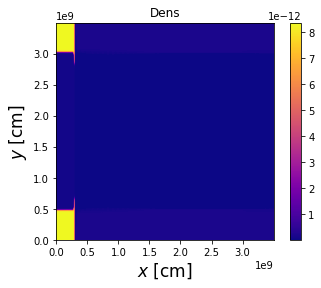

In [12]:
plt.imshow(dens1,cmap='plasma', extent=rango,origin='lower')
plt.title('Dens')
plt.ylabel(r'${y}$ [cm]',fontsize=17)  
plt.xlabel(r'${x}$ [cm]',fontsize=17)
plt.colorbar()
plt.show()


In [13]:
# Quiero elegir un punto, y graficar la propiedad en el tiempo
# Doy el punto en coordenadas físicas:
xm = 0.2e9
ym = 2.0e9
# Encuentro el bloque en x:
ibx = int(xm*niprocs/(xmax-xmin))
#print(ibx)
# Encuentro el bloque en y:
iby = int(ym*njprocs/(ymax-ymin))
#print(iby)
# Entonces el índice del bloque es: 
ib = niprocs*iby+ibx
#print(ib)
# Calculo el indice en x dado el bloque
ixb = int((xm-ibx*(xmax-xmin)/niprocs)*niprocs/(xmax-xmin)*ncx1b)
#print(ixb)
# Calculo el indice en y dado el bloque
iyb = int((ym-iby*(ymax-ymin)/njprocs)*njprocs/(ymax-ymin)*ncy1b)
#print(iyb)
# Luego, la coordenada dado xm e ym sera [ib,0,iyb,ixb]
#print(f['dens'][ib,0,iyb,ixb])

In [14]:
# Defino los índices de tiempo mínimo y máximo
itmin = 0
itmax = 1000
# Defino el tiempo físico
time=np.arange(itmin, itmax+1)*0.5 # 1 plot cada 0.5 segundos
#print(len(time))

pdens1 = np.zeros(len(time))
pdens2 = np.zeros(len(time))
pdens3 = np.zeros(len(time))
#print(pdens)
for i in range(itmin,itmax+1):
#    print('i=',i)
    if   i < 10 :       # Poner el path que corresponda
        f = h5py.File(path+simulacion1+'/'+'welbalanced_hdf5_plt_cnt_000'+str(i),'r')
        g = h5py.File(path+simulacion2+'/'+'welbalanced_hdf5_plt_cnt_000'+str(i),'r')
        h = h5py.File(path+simulacion3+'/'+'welbalanced_hdf5_plt_cnt_000'+str(i),'r')
    elif i < 100 :
        f = h5py.File(path+simulacion1+'/'+'welbalanced_hdf5_plt_cnt_00'+str(i),'r')
        g = h5py.File(path+simulacion2+'/'+'welbalanced_hdf5_plt_cnt_00'+str(i),'r')
        h = h5py.File(path+simulacion3+'/'+'welbalanced_hdf5_plt_cnt_00'+str(i),'r')
    elif i < 1000 :
        f = h5py.File(path+simulacion1+'/'+'welbalanced_hdf5_plt_cnt_0'+str(i),'r')
        g = h5py.File(path+simulacion2+'/'+'welbalanced_hdf5_plt_cnt_0'+str(i),'r')
        h = h5py.File(path+simulacion3+'/'+'welbalanced_hdf5_plt_cnt_0'+str(i),'r')
    else :
        f = h5py.File(path+simulacion1+'/'+'welbalanced_hdf5_plt_cnt_'+str(i),'r')
        g = h5py.File(path+simulacion2+'/'+'welbalanced_hdf5_plt_cnt_'+str(i),'r')
        h = h5py.File(path+simulacion3+'/'+'welbalanced_hdf5_plt_cnt_'+str(i),'r')
#    print(f)
        
    pdens1[i] = f['dens'][ib,0,iyb,ixb]
    pdens2[i] = g['dens'][ib,0,iyb,ixb]
    pdens3[i] = h['dens'][ib,0,iyb,ixb]
#    print('pdens[i]=',pdens[i])
#print(time.shape)
#print(type(time))
#print(time)
#print(pdens.shape)

Text(0.5, 0, 't [s]')

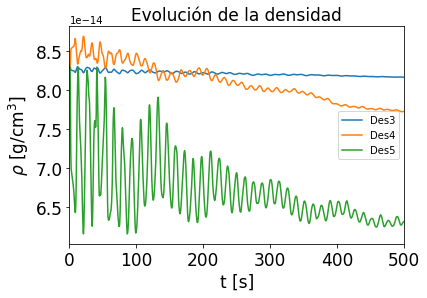

In [15]:
pltdens1, = plt.plot(time,pdens1,label='Des3')
pltdens2, = plt.plot(time,pdens2,label='Des4')
pltdens3, = plt.plot(time,pdens3,label='Des5')
plt.legend(handles=[pltdens1,pltdens2,pltdens3])
#plt.legend(handles=[pdens])
#plt.legend(handles=[pdens,pmagy])
plt.tick_params( labelsize=17)
plt.xlim(time[itmin], time[itmax])
#plt.ylim(emin, emax)
plt.title('Evolución de la densidad',fontsize=17)
plt.ylabel( r'$\rho$ [g/cm$^3$]',fontsize=17)
plt.xlabel('t [s]',fontsize=17)
#plt.savefig(path+simulacion +'/'+pos+'_energia.pdf', bbox_inches='tight')